In [194]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # permite modificar los tickers de los ejes
import pandas as pd

# Datos

In [159]:
A0 = 3.3*3.2
Amax = 5*4
Rmax = Amax - A0
c0 = Rmax/(Amax*A0)
femax = Amax/A0 # factor de envejecimiento maximo
beta = np.log(femax)
alphas = np.array([0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15])
time_0 = 0
time_f = 15
time = np.linspace(time_0,time_f,80)
print(femax)

1.8939393939393938


# Funciones

In [31]:
def P_function(t,alpha):
  ft = Amax/(1+ c0*Amax*np.exp(-alpha*t)) #logistic function with parameter alpha
  Rt = ft-A0
  Pt = Rt/Rmax
  return Pt

def fe_function(t,alpha):
  fe = femax**(P_function(t,alpha))
  return fe

def logistic_function(t):
  ft = 1/(1 + 4*np.exp(-0.25*t))
  return ft

def straight_line(x,alpha):
    x_min = min(x)
    x_max = max(x)
    y_min = fe_function(x_min,alpha) 
    y_max = fe_function(x_max,alpha)
    slop = (y_max - y_min)/(x_max - x_min)
    b = y_min - slop*x_min
    y = slop*x + b
    return y



# Nomogramas

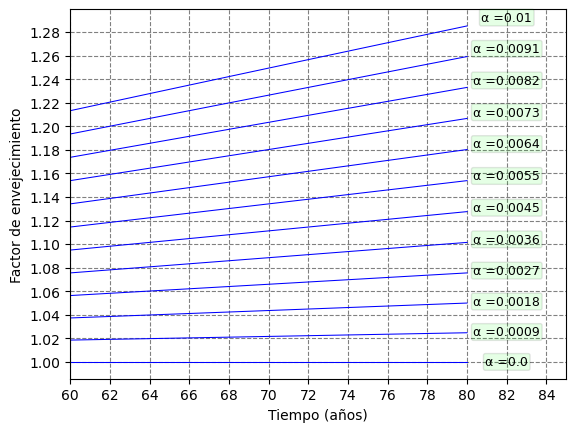

In [4]:
fig = plt.figure()
ax = plt.subplot2grid((1,1),(0,0)) # las escalas de los ejes y el punto de inicio
# Eje secundario y
#ax1 = ax.twinx() # agrega un eje y secundario
#ax1.set_ylim(0, 0.01) # establece el min max del eye secundario y
#ax1.set_yticks(alpha) # divide el eje secundario con el vector alpha dado

# Activacion del grid
ax.grid(True,linestyle='--', color='gray', which = 'major') # activa y modifica las lineas de la grilla primaria
#ax1.grid(True, linestyle='--', color='gray',which='major', axis='y') # activa y modifica laas lineas de la grilla secundaria

# Modificaciones del grid
#ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f')) # formato de los labels del eje y secundario
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f')) # formato de los labels del eje y primario
ax.xaxis.get_major_locator().set_params(nbins=20) # aumenta el numero de lineas guias eje x
ax.yaxis.get_major_locator().set_params(nbins=20) # aumenta el numero de lineas guias eje y primario

ax.set_xlim(60,85) # modifica los limites del eje x

# Etiquetas de los ejes
ax.set_xlabel('Tiempo (años)')
ax.set_ylabel('Factor de envejecimiento')
#ax1.set_ylabel('Alpha')
#ax.set_title('Factor de envejecimiento (tiempo, alpha)')

f = []
for j in alphas:
  for i in time:
    f.append(fe_function(i,j))
  ax.plot(time,f,'b-', linewidth=0.75)
  numero_marcador = round(j,4)
  posicion_marcador = (82,fe_function(82,j))
  ax.annotate('α ='+str(numero_marcador), xy=posicion_marcador, fontsize=9,
            ha='center', va='center', color='black',
            bbox=dict(boxstyle='round,pad=0.15', fc='lime', alpha=0.1))
  #ax.plot(time,f,'b-',label='a', linewidth=0.6)
  f = []

# Guardar la imagen formato .png
ax.figure.savefig('nomograma1.png', dpi=300, bbox_inches='tight')

#ax.legend(loc='center left',bbox_to_anchor=(1.2, 0.5), fontsize='medium')

# NOMOGRAMAAS PARTE 2

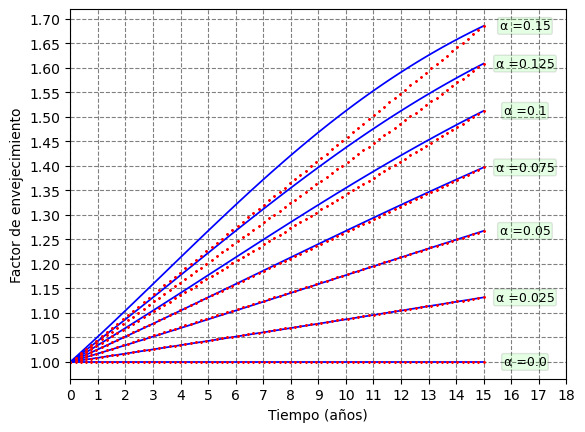

In [160]:
fig = plt.figure()
ax = plt.subplot2grid((1,1),(0,0)) # las escalas de los ejes y el punto de inicio
# Eje secundario y
#ax1 = ax.twinx() # agrega un eje y secundario
#ax1.set_ylim(0, 0.01) # establece el min max del eye secundario y
#ax1.set_yticks(alpha) # divide el eje secundario con el vector alpha dado

# Activacion del grid
ax.grid(True,linestyle='--', color='gray', which = 'major') # activa y modifica las lineas de la grilla primaria
#ax1.grid(True, linestyle='--', color='gray',which='major', axis='y') # activa y modifica laas lineas de la grilla secundaria

# Modificaciones del grid
#ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f')) # formato de los labels del eje y secundario
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f')) # formato de los labels del eje y primario
ax.xaxis.get_major_locator().set_params(nbins=20) # aumenta el numero de lineas guias eje x
ax.yaxis.get_major_locator().set_params(nbins=20) # aumenta el numero de lineas guias eje y primario

ax.set_xlim(time_0,time_f+3) # modifica los limites del eje x

# Etiquetas de los ejes
ax.set_xlabel('Tiempo (años)')
ax.set_ylabel('Factor de envejecimiento')
#ax1.set_ylabel('Alpha')
#ax.set_title('Factor de envejecimiento (tiempo, alpha)')

f = []
for j in alphas:
    for i in time:
        f.append(fe_function(i,j))
    ax.plot(time,f,'b-', linewidth=1.25)
    ax.plot(time, straight_line(time,j),'r*', markersize = 1.5)
    numero_marcador = round(j,4)
    posicion_marcador = (time_f + 1.5,fe_function(time_f ,j))
    ax.annotate('α ='+str(numero_marcador), xy=posicion_marcador, fontsize=9,
            ha='center', va='center', color='black',
            bbox=dict(boxstyle='round,pad=0.15', fc='lime', alpha=0.1))
    #ax.plot(time,f,'b-',label='a', linewidth=0.6)
    f = []

# Guardar la imagen formato .png
ax.figure.savefig('nomograma2.png', dpi=300, bbox_inches='tight')

#ax.legend(loc='center left',bbox_to_anchor=(1.2, 0.5), fontsize='medium')

# MONOGRAMA PARTE 3

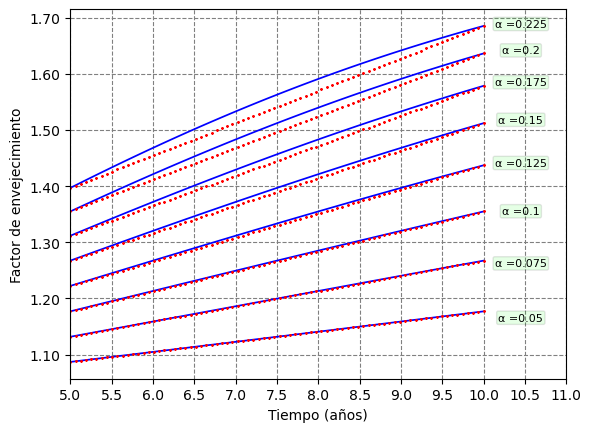

In [178]:
fig = plt.figure()
ax = plt.subplot2grid((1,1),(0,0)) # las escalas de los ejes y el punto de inicio

alphas = np.array([0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225])
time = np.linspace(5,10,80)
# Eje secundario y
#ax1 = ax.twinx() # agrega un eje y secundario
#ax1.set_ylim(0, 0.01) # establece el min max del eye secundario y
#ax1.set_yticks(alpha) # divide el eje secundario con el vector alpha dado

# Activacion del grid
ax.grid(True,linestyle='--', color='gray', which = 'major') # activa y modifica las lineas de la grilla primaria
#ax1.grid(True, linestyle='--', color='gray',which='major', axis='y') # activa y modifica laas lineas de la grilla secundaria

# Modificaciones del grid
#ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f')) # formato de los labels del eje y secundario
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f')) # formato de los labels del eje y primario
ax.xaxis.get_major_locator().set_params(nbins=20) # aumenta el numero de lineas guias eje x
ax.yaxis.get_major_locator().set_params(nbins=10) # aumenta el numero de lineas guias eje y primario

ax.set_xlim(5,11) # modifica los limites del eje x

# Etiquetas de los ejes
ax.set_xlabel('Tiempo (años)')
ax.set_ylabel('Factor de envejecimiento')
#ax1.set_ylabel('Alpha')
#ax.set_title('Factor de envejecimiento (tiempo, alpha)')

f = []
for j in alphas:
    for i in time:
        f.append(fe_function(i,j))
    ax.plot(time,f,'b-', linewidth=1.25)
    ax.plot(time, straight_line(time,j),'r*', markersize = 1.5)
    numero_marcador = round(j,4)
    posicion_marcador = (10.45,fe_function(10.75 ,j)-0.025)
    ax.annotate('α ='+str(numero_marcador), xy=posicion_marcador, fontsize=8,
            ha='center', va='center', color='black',
            bbox=dict(boxstyle='round,pad=0.15', fc='lime', alpha=0.1))
    #ax.plot(time,f,'b-',label='a', linewidth=0.6)
    f = []

# Guardar la imagen formato .png
ax.figure.savefig('nomograma3.png', dpi=300, bbox_inches='tight')

#ax.legend(loc='center left',bbox_to_anchor=(1.2, 0.5), fontsize='medium')

# Tablas

In [238]:
import pandas as pd

# Inicialización de variables
data = {}
n = 8  # Número de columnas
m = 5   # Número de filas
alphas = []
columns_labels = []
index_labels = ['t = 1']
times = [1]

# Generación de etiquetas de columnas
for i in range(n):
    alpha = round(0.05 + 0.025 * i, 4)
    alphas.append(alpha)
    columns_labels.append(f"α={alpha}")

# Generación de etiquetas de filas
for j in range(1, m):
    time = 5 * j
    times.append(time)
    index_labels.append(f"t = {time}")

# Creación del DataFrame
data = {col: [None]*m for col in columns_labels}

# Creación del DataFrame
df = pd.DataFrame(data, index=index_labels)

for i in range(m):
    for j in range(n):
        df.iloc[i,j] = round(fe_function(times[i],alphas[j]),4)
# Imprimimos la Tabla 1
print(df)
#Pasamos la tabla a formato word
tabla_latex = df.to_latex(float_format="%.3f",index=True)
print(tabla_latex)

        α=0.05 α=0.075   α=0.1 α=0.125  α=0.15 α=0.175   α=0.2 α=0.225
t = 1    1.017  1.0255  1.0342  1.0428  1.0516  1.0603  1.0691   1.078
t = 5   1.0869  1.1317   1.177  1.2223  1.2674  1.3117   1.355   1.397
t = 10   1.177  1.2674   1.355  1.4373  1.5123  1.5789  1.6366  1.6856
t = 15  1.2674   1.397  1.5123  1.6089  1.6856  1.7443  1.7878  1.8194
t = 20   1.355  1.5123  1.6366  1.7266  1.7878  1.8278  1.8531  1.8689
\begin{tabular}{lllllllll}
\toprule
 & α=0.05 & α=0.075 & α=0.1 & α=0.125 & α=0.15 & α=0.175 & α=0.2 & α=0.225 \\
\midrule
t = 1 & 1.017 & 1.026 & 1.034 & 1.043 & 1.052 & 1.060 & 1.069 & 1.078 \\
t = 5 & 1.087 & 1.132 & 1.177 & 1.222 & 1.267 & 1.312 & 1.355 & 1.397 \\
t = 10 & 1.177 & 1.267 & 1.355 & 1.437 & 1.512 & 1.579 & 1.637 & 1.686 \\
t = 15 & 1.267 & 1.397 & 1.512 & 1.609 & 1.686 & 1.744 & 1.788 & 1.819 \\
t = 20 & 1.355 & 1.512 & 1.637 & 1.727 & 1.788 & 1.828 & 1.853 & 1.869 \\
\bottomrule
\end{tabular}



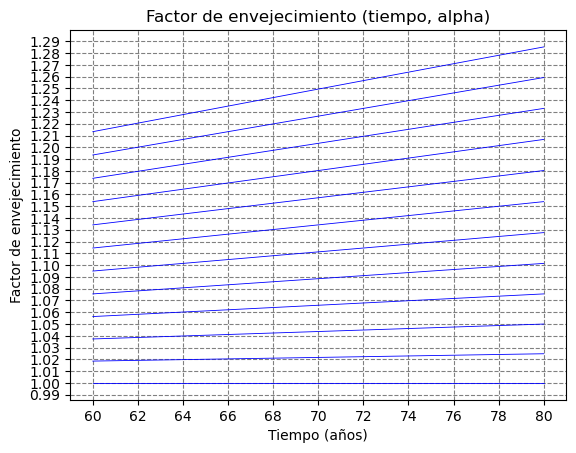

In [5]:
fig = plt.figure()
ax = plt.subplot2grid((1,1),(0,0)) # las escalas de los ejes y el punto de inicio
# Eje secundario y
#ax1 = ax.twinx() # este eje agrega un eje y secundario
#ax1.set_ylim(0, 0.01) # establece el min max del eye secundario y
#ax1.set_yticks(alpha) # divide el eje secundario

# Activacion del grid
ax.grid(True,linestyle='--', color='gray', which = 'major') # activa y modifica las lineas de la grilla primaria
#ax1.grid(True, linestyle='--', color='gray',which='major', axis='y') # activa y modifica laas lineas de la grilla secundaria

# Modificaciones del grid
#ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f')) # formato de los labels del eje y secundario
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f')) # formato de los labels del eje y primario
ax.xaxis.get_major_locator().set_params(nbins=20) # aumenta el numero de lineas guias eje x
ax.yaxis.get_major_locator().set_params(nbins=40) # aumenta el numero de lineas guias eje y primario

# Etiquetas de los ejes
ax.set_xlabel('Tiempo (años)')
ax.set_ylabel('Factor de envejecimiento')
#ax1.set_ylabel('Alpha')
ax.set_title('Factor de envejecimiento (tiempo, alpha)')

f = []
for j in alpha:
  for i in time:
    f.append(fe_function(i,j))
  ax.plot(time,f,'b-', linewidth=0.6)
  #ax.plot(time,f,'b-',label='a', linewidth=0.6)
  f = []

# Guardar la imagen formato .png
ax.figure.savefig('nomograma2.png', dpi=300, bbox_inches='tight')

#ax.legend(loc='center left',bbox_to_anchor=(1.2, 0.5), fontsize='medium')

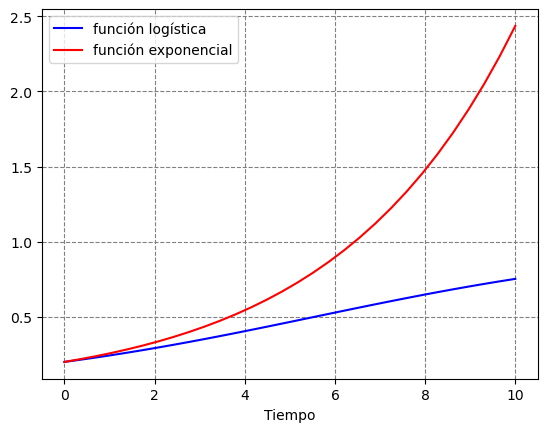

In [6]:
fig1 = plt.figure()
ax2 = plt.subplot2grid((1,1),(0,0))
ax2.grid(True,linestyle='--', color='gray',)

x = np.linspace(0,10,30)
y = []
y1 = []
for i in x:
  y.append(logistic_function(i))
  y1.append(0.2*np.exp(0.25*i))

ax2.plot(x,y,'b-',label='función logística')
ax2.plot(x,y1,'r-',label='función exponencial')
ax2.legend()
ax2.set_xlabel('Tiempo')

# Guardar la imagen formato .png
ax2.figure.savefig('grafico1.png', dpi=300, bbox_inches='tight')